In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from scipy.stats import kstest
%matplotlib inline

# Bike Sharing Demand

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной постановке задачи доступно 11 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются.


In [2]:
os.chdir('../mmn1')
df = pd.read_csv('bike_sharing_demand.csv')
os.chdir('../Kursach')

Датасет для подальшого опрацювання виглядає наступним чином:

In [3]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Змінимо тип даних колонки datetime

In [6]:
df['datetime'] = df['datetime'].apply(pd.to_datetime)

In [7]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Додамо місяць та годину, коли велосипед було орендовано.

In [8]:
df['month'] = df['datetime'].apply(lambda x : x.month)

In [9]:
df['hour'] = df['datetime'].apply(lambda x : x.hour)

In [10]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                  int64
hour                   int64
dtype: object

In [11]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  hour  
0        81        0.0       3          13     16      1     0  
1        80        0.0       8          32     40      1     1  
2        80        0.0       5          27     32      1     2  
3        75        0.0       3          10     13      1     3  
4        75        0.0       0           1      1      1     4

## 1. Проаналізувати набір даних на наявність пропущених значень та NaN. У випадку наявності таких значень замінити їх за допомогою методу ковзного вікна.

Для виявлення пропущених значень та NaN використовується метод isna(), який повертає датафрейм тієї ж розмірності, але кожне значення замінюється на True, якщо на цьому місці стоїть NaN або значення відсутнє, та False в інших випадках.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html


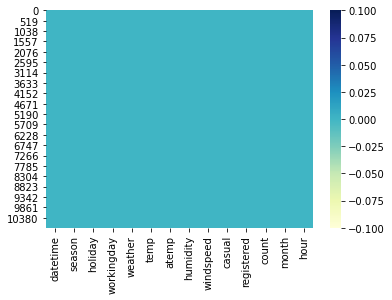

In [12]:
sns.heatmap(df.isna(), cmap = "YlGnBu")
plt.show()

Невизначених комірок немає.
Оцінимо кореляцію з колонкою count.

In [13]:
df.corrwith(df['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
month         0.166862
hour          0.400601
dtype: float64

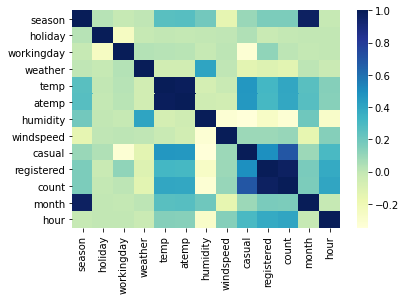

In [14]:
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

Можна побачити, що параметри temp та atemp, month та season, casual, registered, count корелюють між собою.
Треба буде позбутись від стовпців casual та registered, бо з них однозначно відновлюється стовпець count.

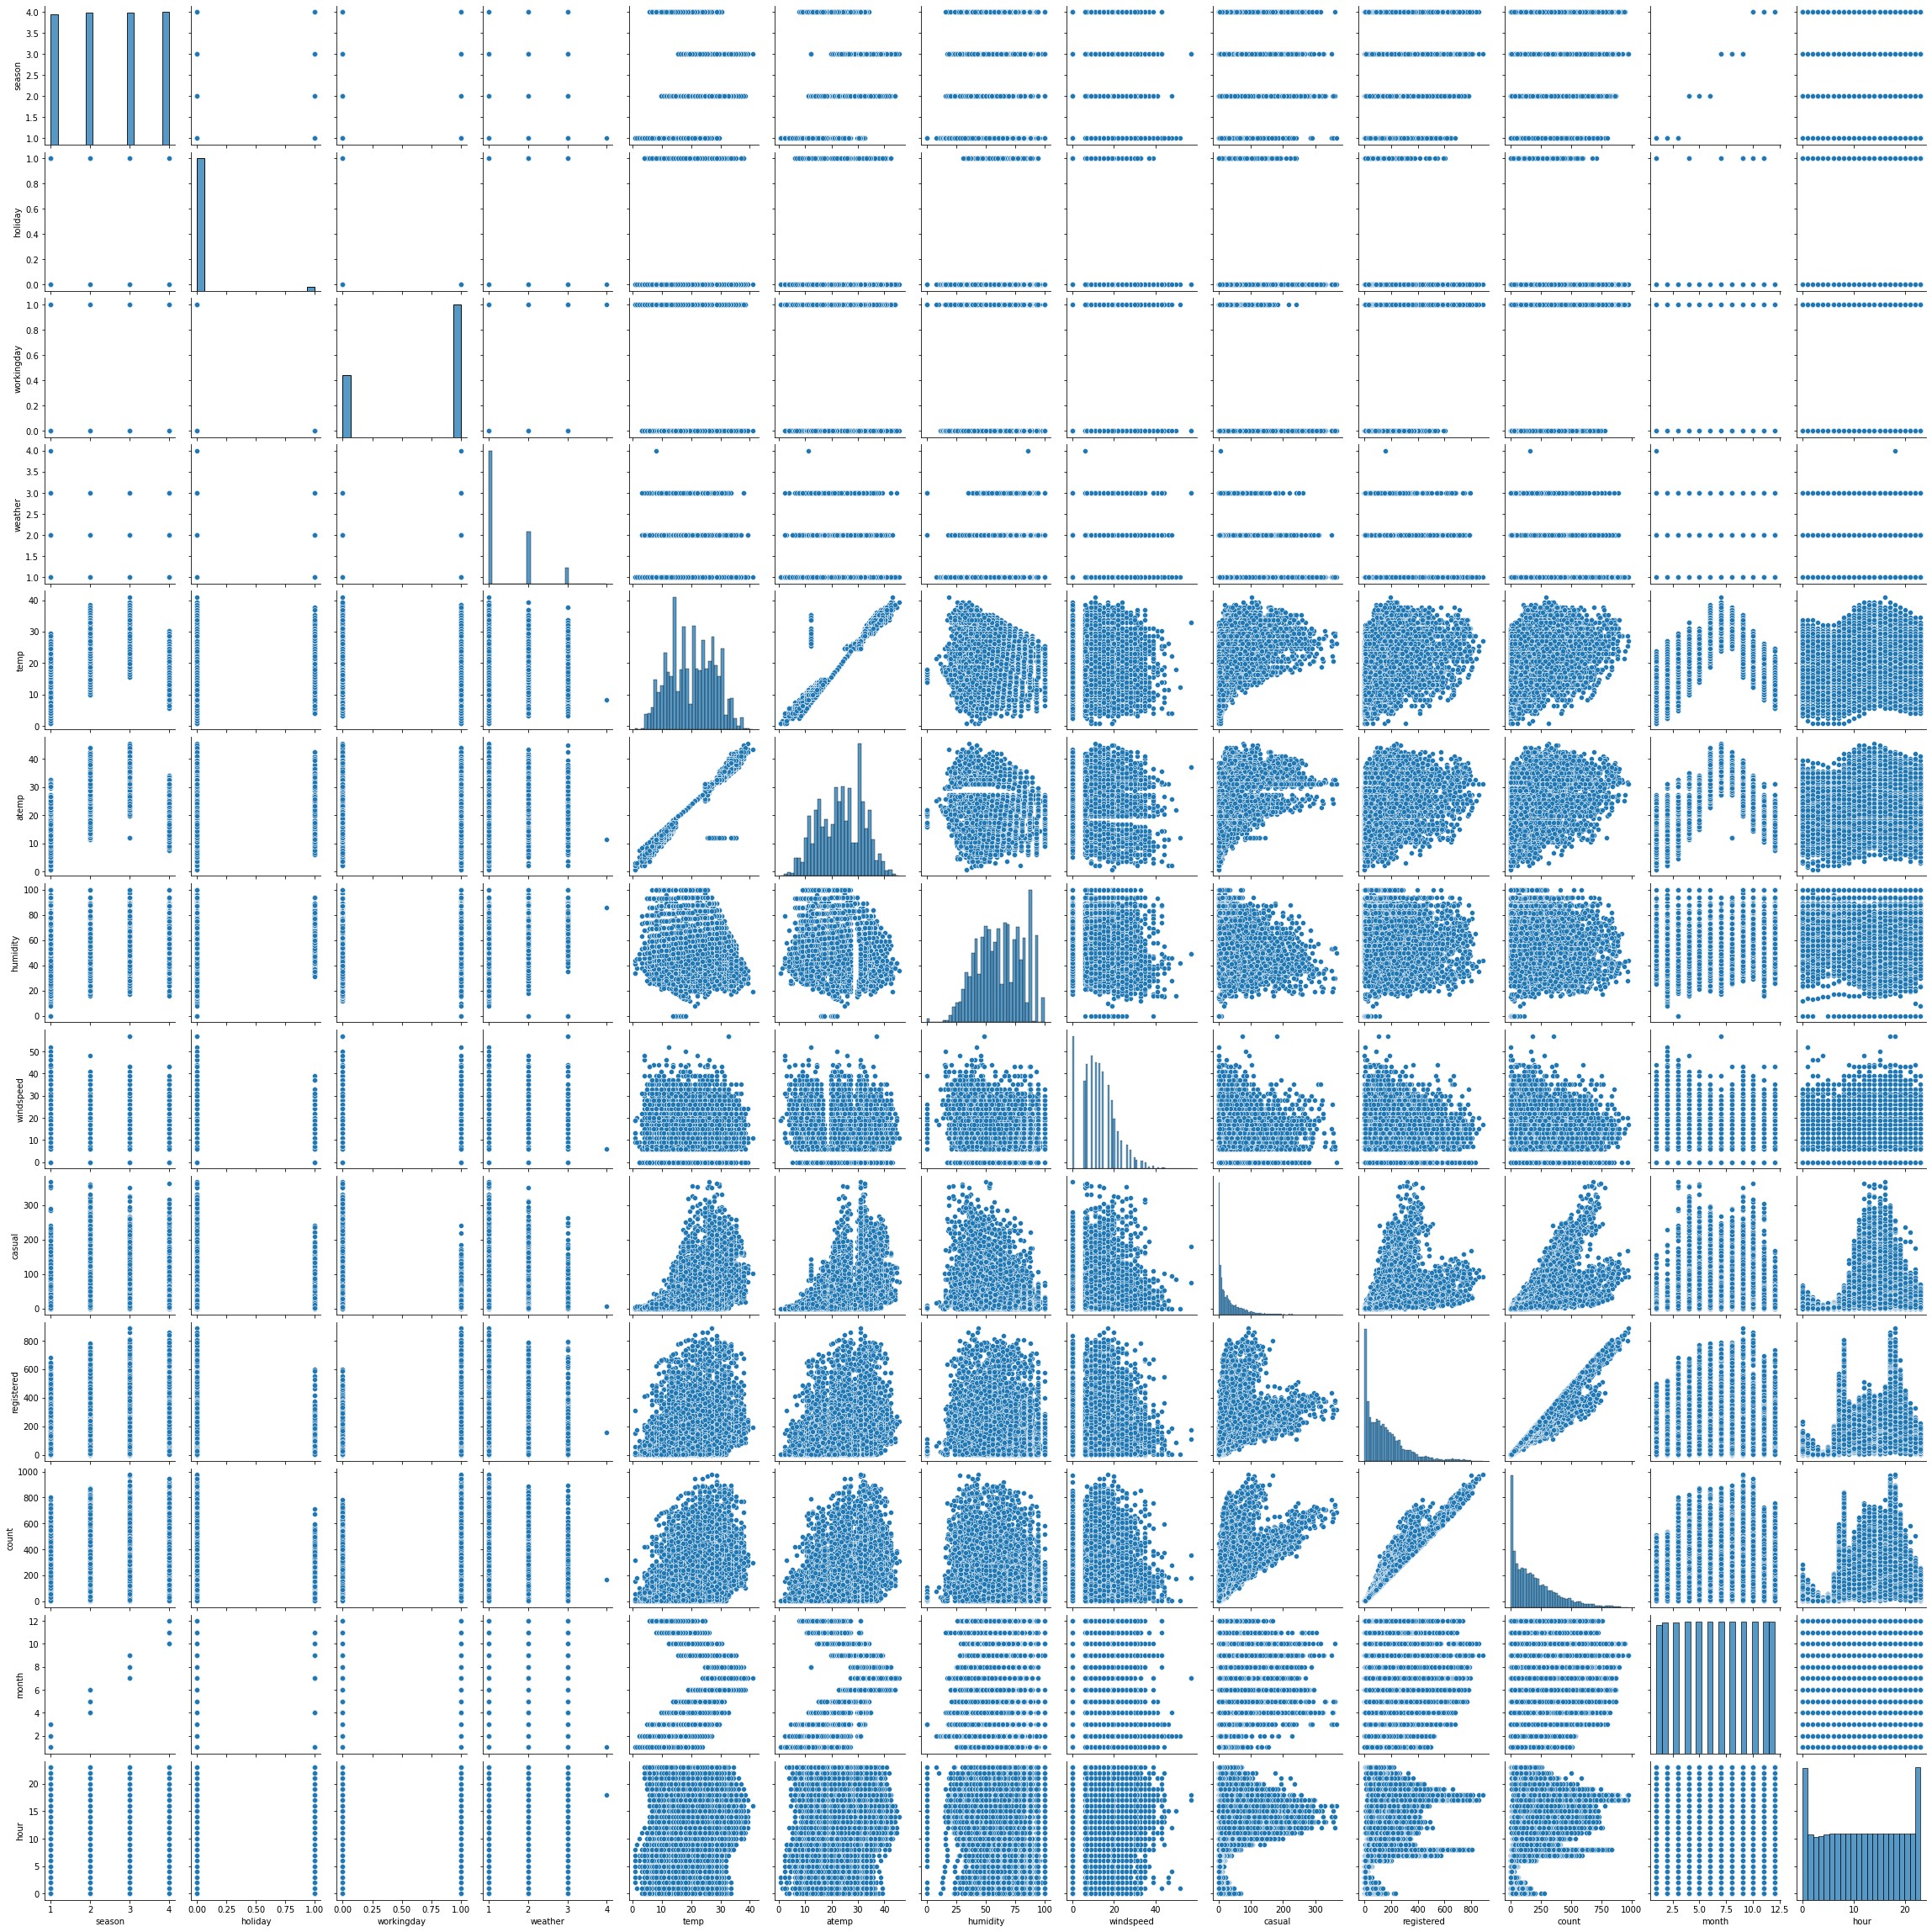

In [242]:
sns.pairplot(data = df)
plt.show()

Можна побачити кореляцію значень та майже лінійну залежність для count, registered, casual.

In [15]:
df.corrwith(df['count']) > 0.6

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual         True
registered     True
count          True
month         False
hour          False
dtype: bool

In [16]:
df = df.drop(['season', 'atemp', 'registered', 'casual', 'datetime'], axis = 1)
df.head() #######

holiday  workingday  weather  temp  humidity  windspeed  count  month  hour
0        0           0        1  9.84        81        0.0     16      1     0
1        0           0        1  9.02        80        0.0     40      1     1
2        0           0        1  9.02        80        0.0     32      1     2
3        0           0        1  9.84        75        0.0     13      1     3
4        0           0        1  9.84        75        0.0      1      1     4

In [378]:
# df = df.drop('datetime', axis = 1)

In [17]:
df.corrwith(df['count'])

holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
humidity     -0.317371
windspeed     0.101369
count         1.000000
month         0.166862
hour          0.400601
dtype: float64

## 2. Провести візуалізацію даних. Побудувати такі типи графіків: Line Plot, Bar Chart, Histogram, Heatmap. При цьому для візуалізації багатовимірних даних з кількістю ознак більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за допомогою комбінування різних ознак.¶

Графіки Line Plot використовуються для первинного відстеження залежностей. Побудуємо графіки за ознаками, що корелюють з count більше за інші:

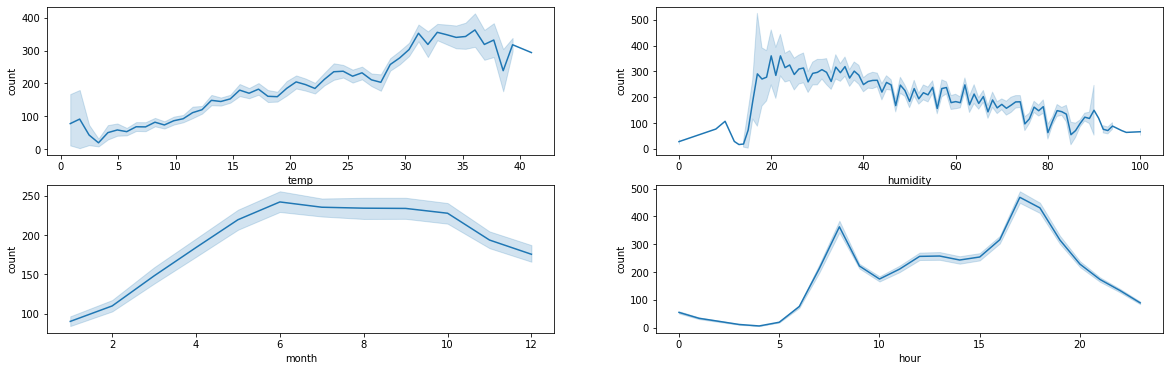

In [18]:
fig = plt.figure(figsize = (20, 6))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)
# ax_5 = fig.add_subplot(2, 2, 5)


sns.lineplot(data = df, x = "temp", y = "count", ax = ax_1)
sns.lineplot(data = df, x = "humidity", y = "count", ax = ax_2)
sns.lineplot(data = df, x = "month", y = "count", ax = ax_3)
sns.lineplot(data = df, x = "hour", y = "count", ax = ax_4)
# sns.lineplot(data = df, x = "temp", y = "count", ax = ax_5)
plt.show()

Аналізуючи перший графік можна побачити майже лінійну залежність.

На графіках Bar Chart зручно аналізувати числові характеристики залежностей:

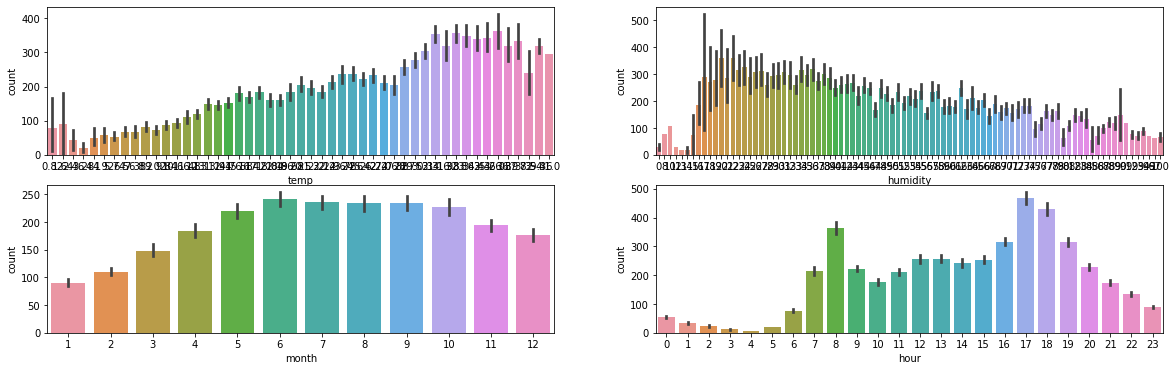

In [20]:
fig = plt.figure(figsize = (20, 6))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)
# ax_5 = fig.add_subplot(2, 2, 5)


sns.barplot(data = df, x = "temp", y = "count", ax = ax_1)
sns.barplot(data = df, x = "humidity", y = "count", ax = ax_2)
sns.barplot(data = df, x = "month", y = "count", ax = ax_3)
sns.barplot(data = df, x = "hour", y = "count", ax = ax_4)
# sns.lineplot(data = df, x = "temp", y = "count", ax = ax_5)
plt.show()

Використовуючи графік pairplot можна візуалізувати відношення між усіма можливими парами змінних:

/home/user/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


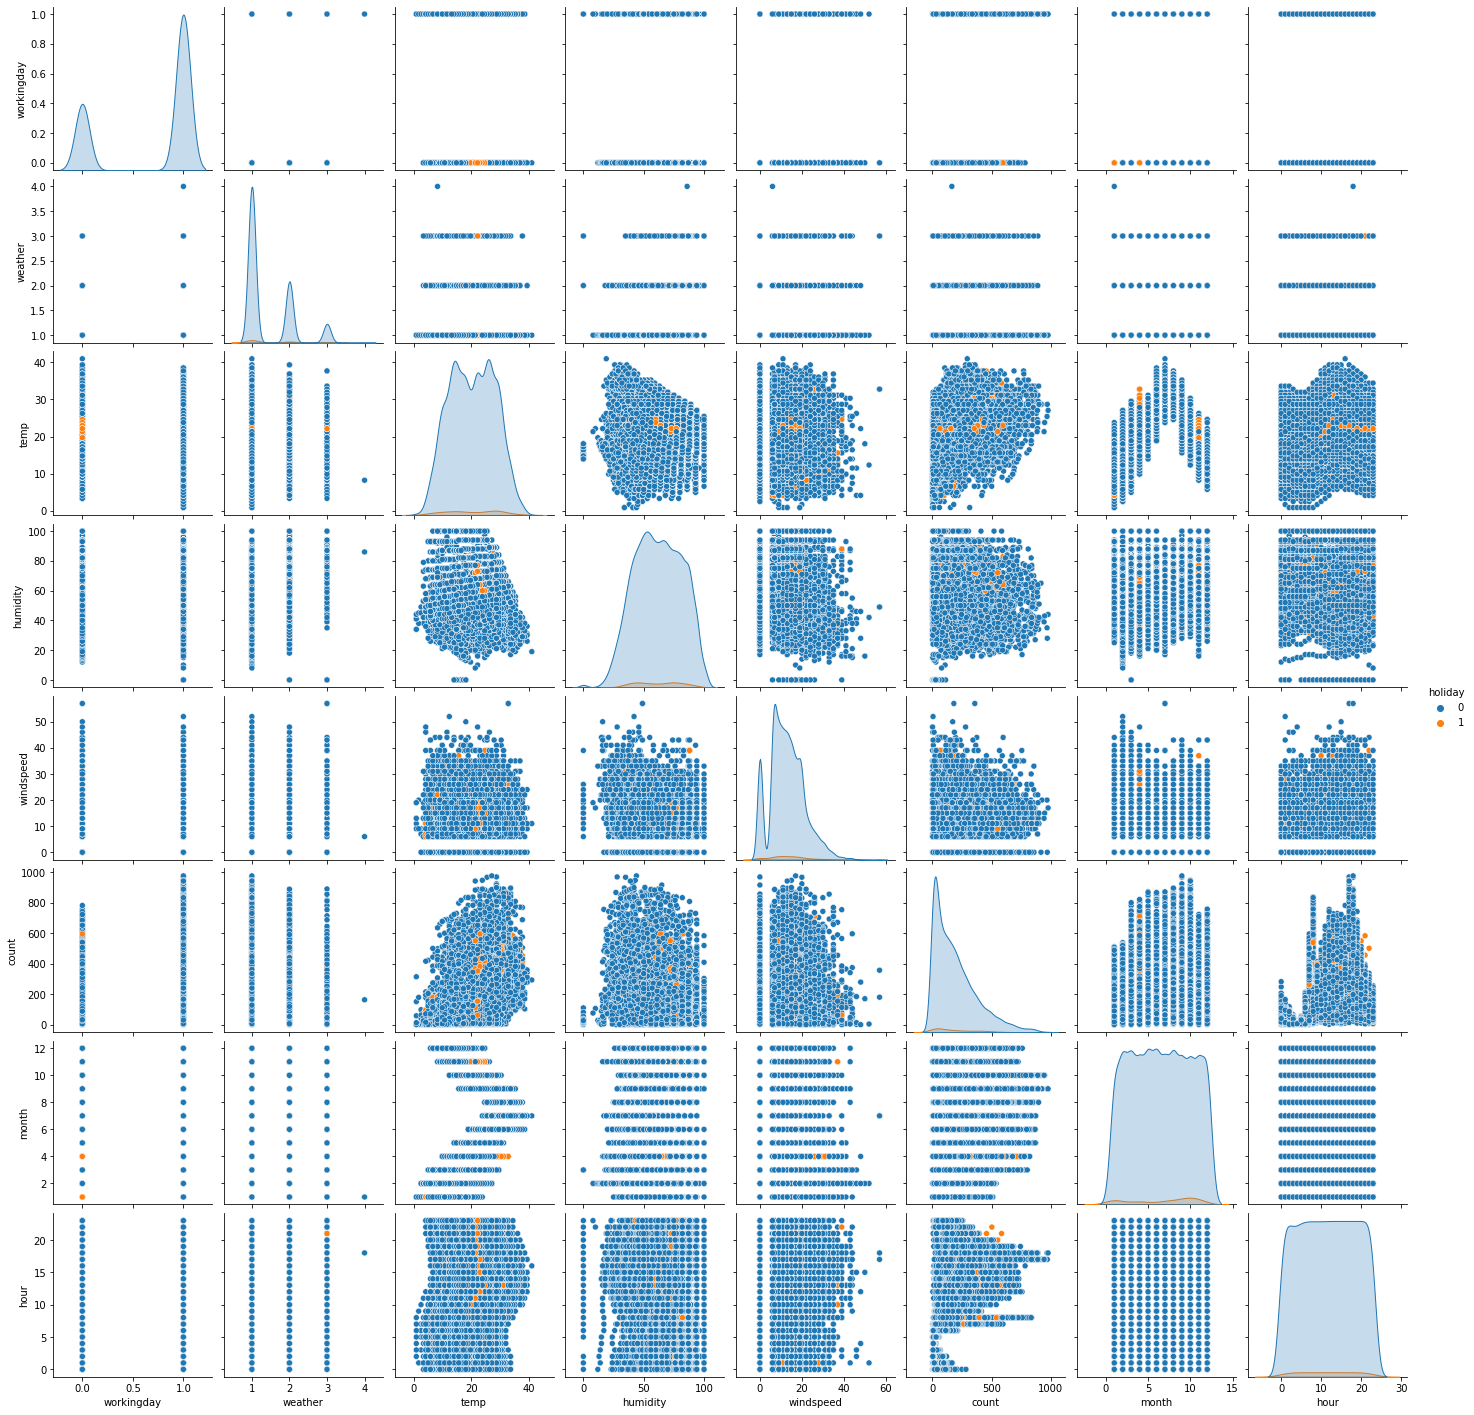

In [21]:
sns.pairplot(data = df, hue = 'holiday')
plt.show()

## 3.Вирахувати математичне сподівання та дисперсію σ для набору даних. Стандартизувати дані.

In [22]:
titles = list(df.keys())
for title in titles:
    print("Мат. сподівання {0}: {1}\n\tДисперсія {0}: {2}".format(title, df[title].mean(), df[title].std()))

Мат. сподівання holiday: 0.02856880396839978
	Дисперсія holiday: 0.16659885062471985
Мат. сподівання workingday: 0.6808745177291935
	Дисперсія workingday: 0.4661591687997421
Мат. сподівання weather: 1.418427337865148
	Дисперсія weather: 0.6338385858190921
Мат. сподівання temp: 20.230859819952173
	Дисперсія temp: 7.791589843987506
Мат. сподівання humidity: 61.88645967297446
	Дисперсія humidity: 19.245033277394786
Мат. сподівання windspeed: 12.799395406945093
	Дисперсія windspeed: 8.16453732683849
Мат. сподівання count: 191.57413191254824
	Дисперсія count: 181.14445383028496
Мат. сподівання month: 6.521495498805805
	Дисперсія month: 3.4443734957807
Мат. сподівання hour: 11.541613081021495
	Дисперсія hour: 6.915837969197701


In [23]:
df = pd.DataFrame(StandardScaler().fit_transform(df)).rename(columns = {i : titles[i] for i in range(len(titles))})
df.head()

holiday  workingday   weather      temp  humidity  windspeed     count  \
0 -0.17149   -1.460672 -0.660178 -1.333661  0.993213  -1.567754 -0.969294   
1 -0.17149   -1.460672 -0.660178 -1.438907  0.941249  -1.567754 -0.836797   
2 -0.17149   -1.460672 -0.660178 -1.438907  0.941249  -1.567754 -0.880962   
3 -0.17149   -1.460672 -0.660178 -1.333661  0.681430  -1.567754 -0.985856   
4 -0.17149   -1.460672 -0.660178 -1.333661  0.681430  -1.567754 -1.052104   

      month      hour  
0 -1.603121 -1.668944  
1 -1.603121 -1.524341  
2 -1.603121 -1.379739  
3 -1.603121 -1.235137  
4 -1.603121 -1.090534

In [24]:
for title in titles:
    print("Мат. сподівання {0}: {1}\n\tДисперсія {0}: {2}".format(title, round(abs(df[title].mean())), round(df[title].std())))

Мат. сподівання holiday: 0
	Дисперсія holiday: 1
Мат. сподівання workingday: 0
	Дисперсія workingday: 1
Мат. сподівання weather: 0
	Дисперсія weather: 1
Мат. сподівання temp: 0
	Дисперсія temp: 1
Мат. сподівання humidity: 0
	Дисперсія humidity: 1
Мат. сподівання windspeed: 0
	Дисперсія windspeed: 1
Мат. сподівання count: 0
	Дисперсія count: 1
Мат. сподівання month: 0
	Дисперсія month: 1
Мат. сподівання hour: 0
	Дисперсія hour: 1


## 4. За допомогою Random Forest моделі визначити інформативність признаків.

Використовуючи модель Random Forest, можна виміряти інформативність ознаки[2]. Для цього необхідно навчити модель на вибірці і під час побудови моделі для кожного елемента навчальної вибірки порахувати out-of-bag-помилку. Потім для кожного об'єкта така помилка усереднюється по всьому випадковому лісу. Щоб оцінити інформативність ознаки, її значення перемішуються для всіх об'єктів навчальної вибірки і out-of-bag-помилка рахується знову. Важливість ознаки оцінюється шляхом усереднення по всіх деревах різниці показників out-of-bag-помилок до і після перемішування значень.

Програмно інформативність ознак визначається за допомогою метода feature_importances класа RandomForestRegressor:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [25]:
X = df.drop('count', axis = 1)
Y = df['count']
# X.head()

RF = RandomForestRegressor().fit(X, Y)
importances = RF.feature_importances_
titles = list(df.drop('count', axis = 1).keys())
for i in range(len(titles)):
    print('Інформативність {0}: {1}'.format(titles[i], round(importances[i], 6)))

Інформативність holiday: 0.003262
Інформативність workingday: 0.066704
Інформативність weather: 0.021223
Інформативність temp: 0.141378
Інформативність humidity: 0.072313
Інформативність windspeed: 0.035815
Інформативність month: 0.054151
Інформативність hour: 0.605154


## 5. Зменшити розмірність даних за допомогою методу Principal Components Analysis (PCA) до двох вимірів та провести візуалізацію, що вимагається в пункті 2.

Аналіз головних компонент (pгincipal component analysis, РСА) - це метод лінійного перетворення, що належить до типу навчання без учителя, який широко використовується в самих різних областях, найчастіше для зниження розмірності. РСА допомагає ідентифікувати повторювані образи в даних, ґрунтуючись на кореляції між ознаками. Якщо коротко, то РСА знаходить напрямки з максимальною дисперсією в багатовимірних даних і проектує їх на новий підпростір з меншим числом розмірностей, ніж вихідне. Ортогональні осі нового підпростору можна інтерпретувати як напрямки максимальної дисперсії в умовах обмеження, що осі нових признаків ортогональні.

Спочатку для стандартизованого d-вимірного набору даних вираховуєтсья коваріаційна матриця. Після цього відбувається розклад матриці на власні вектори та власні числа. Наступним кроком є вибір k власних векторів які відповідають k найбільшим власним значенням, де k - кількість вимірів у новому просторі даних. Оскільки власні числа відповідають довжині власних векторів, вибравши найбільші в якості осей для нового простору, ми залишаємо найбільшу частину дисперсії, що в свою чергу зменшує кількість втраченої інформації. Останнім кроком є створення проекційної матриці W, із k найбільших векторів та перепроектування d-вимірного набору даних у k-вимірний.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [387]:
PCA_data = PCA(n_components = 2).fit_transform(X)

In [388]:
PCA_data = pd.DataFrame(data = PCA_data, columns = ['PC_1', 'PC_2'])
PCA_data['count'] = Y
PCA_data.head()

PC_1      PC_2     count
0 -1.346381  2.183120 -0.969294
1 -1.263669  2.213340 -0.836797
2 -1.208944  2.172867 -0.880962
3 -0.976562  2.049493 -0.985856
4 -0.921837  2.009020 -1.052104

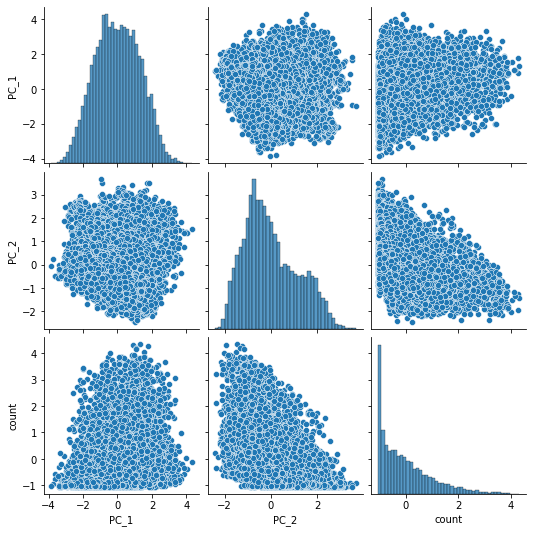

In [389]:
sns.pairplot(data = PCA_data)
plt.show()

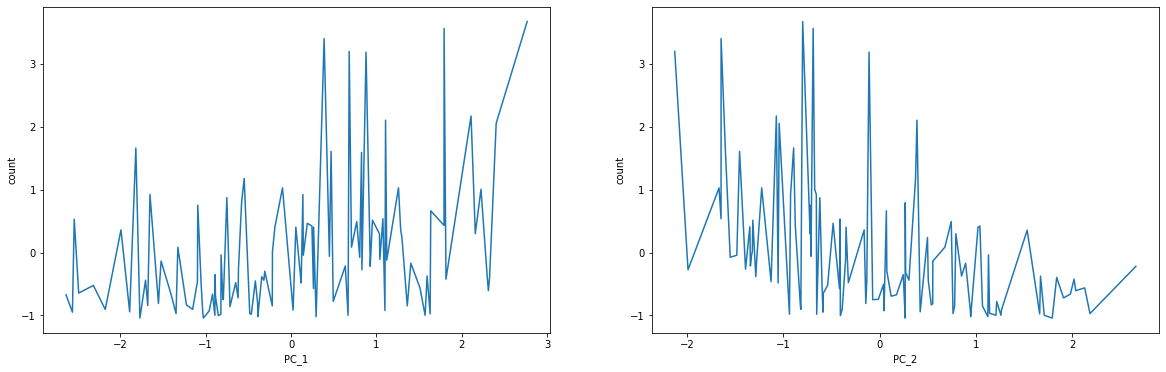

In [390]:
fig = plt.figure(figsize = (20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data = PCA_data[::100], x = "PC_1", y = "count", ax = ax_1)
sns.lineplot(data = PCA_data[::100], x = "PC_2", y = "count", ax = ax_2)


plt.show()

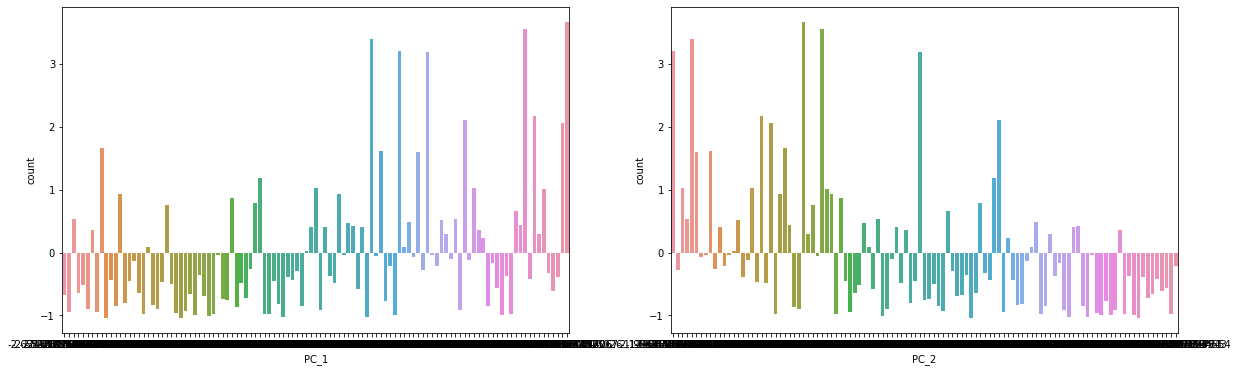

In [391]:
fig = plt.figure(figsize = (20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

sns.barplot(data = PCA_data[::100], x = "PC_1", y = "count", ax = ax_1)
sns.barplot(data = PCA_data[::100], x = "PC_2", y = "count", ax = ax_2)


plt.show()

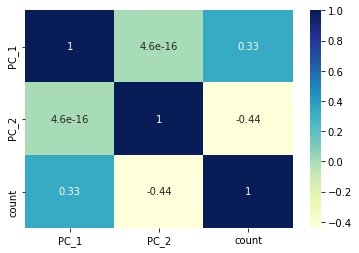

In [392]:
sns.heatmap(PCA_data.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

## Вирахувати відсотки дисперсії для власних векторів та визначити скільки потрібно залишити власних векторів, щоб залишилося більше 90% дисперсії.

Для визначення відсотків дисперсії власних векторів, метод PCA використовується для датасету без вказання кількості компонент:


In [393]:
pca = PCA(n_components = None)
_ = pca.fit(X)

In [394]:
pca.explained_variance_

array([1.7032802 , 1.3117279 , 1.25393507, 1.05940783, 0.80496315,
       0.74860119, 0.68693348, 0.43188612])

In [465]:
pca.explained_variance_ratio_.cumsum()

array([0.21289047, 0.37684139, 0.53356888, 0.66598269, 0.76659384,
       0.8601604 , 0.94601919, 1.        ])

Тому для збереження > 90% дисперсії треба залишити 7 власних векторів.

Спочатку залишимо 3 параметри.

In [396]:
X_PCA = PCA(n_components = 3).fit_transform(X)
PCA_data1 = pd.DataFrame(data = X_PCA, columns = ['PC_1', 'PC_2', 'PC_3'])
PCA_data1['count'] = Y

In [397]:
PCA_data1.head()

PC_1      PC_2      PC_3     count
0 -1.346381  2.183120  0.877675 -0.969294
1 -1.263669  2.213340  0.871701 -0.836797
2 -1.208944  2.172867  0.870895 -0.880962
3 -0.976562  2.049493  0.877377 -0.985856
4 -0.921837  2.009020  0.876571 -1.052104

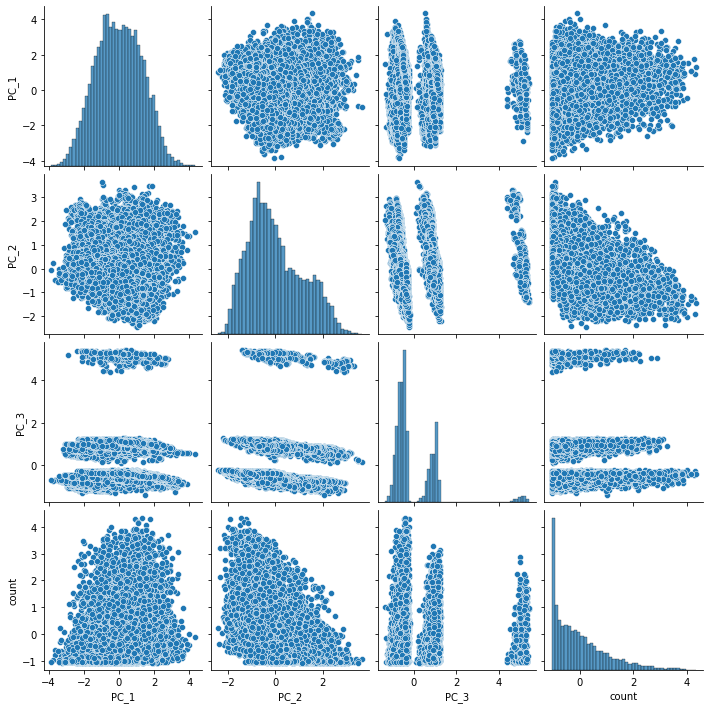

In [398]:
sns.pairplot(data = PCA_data1)
plt.show()

Як можна побачити на зображенні, третя величина розподілена не за нормальним законом. Отже і 4 або 5 величина не буде мати нормального розподілу.

## 6. Оцінити залежність між набором даних та набором предикторів за допомогою коефіцієнту Пірсона.

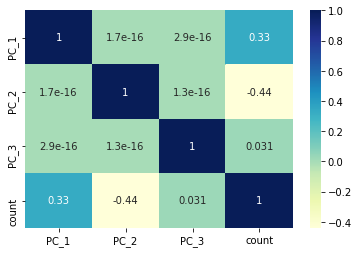

In [461]:
sns.heatmap(PCA_data1.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

Значення коефіцієнтів Пірсона не дуже сильно, але зменшились в порівнянні з початковими даними, тому для подальшої роботи залишається стандартизований датасет без використання РСА.

## 7. Використати правило 68-95-99.7 для набору даних, визначити чи розподіл даних є подібним до нормального розподілу.

In [464]:
titles = ['PC_1', 'PC_2', 'PC_3', 'count']

for i in titles:
    m = PCA_data1[f'{i}'].mean()
    s = PCA_data1[f'{i}'].std()
    val = [0, 0, 0]                                                                                           #;print_foo();pass
    for j in PCA_data1[f'{i}'].values:
        if j > m - s and j < m + s:
            val[0] += 1
        if j > m - 2 * s and j < m + 2 * s:
            val[1] += 1
        if j > m - 3 * s and j < m + 3 * s:    
            val[2] += 1
    print(f'\nPr⁡(µ - 1σ ≤ {i} ≤ µ + 1σ) =', val[0] / PCA_data1.shape[0])
    print(f'Pr⁡(µ - 2σ ≤ {i} ≤ µ + 2σ) =', val[1] / PCA_data1.shape[0])
    print(f'Pr⁡(µ - 3σ ≤ {i} ≤ µ + 3σ) =', val[2] / PCA_data1.shape[0])


Pr⁡(µ - 1σ ≤ PC_1 ≤ µ + 1σ) = 0.6480801028844387
Pr⁡(µ - 2σ ≤ PC_1 ≤ µ + 2σ) = 0.967940474003307
Pr⁡(µ - 3σ ≤ PC_1 ≤ µ + 3σ) = 0.9997244166819769

Pr⁡(µ - 1σ ≤ PC_2 ≤ µ + 1σ) = 0.6508359360646703
Pr⁡(µ - 2σ ≤ PC_2 ≤ µ + 2σ) = 0.967940474003307
Pr⁡(µ - 3σ ≤ PC_2 ≤ µ + 3σ) = 0.9996325555759691

Pr⁡(µ - 1σ ≤ PC_3 ≤ µ + 1σ) = 0.9247657541796803
Pr⁡(µ - 2σ ≤ PC_3 ≤ µ + 2σ) = 0.9714311960316002
Pr⁡(µ - 3σ ≤ PC_3 ≤ µ + 3σ) = 0.9714311960316002

Pr⁡(µ - 1σ ≤ count ≤ µ + 1σ) = 0.7316737093514606
Pr⁡(µ - 2σ ≤ count ≤ µ + 2σ) = 0.9458938085614551
Pr⁡(µ - 3σ ≤ count ≤ µ + 3σ) = 0.9864964174168657


Можна побачити, що параметр PC_3 не є нормально розподіленим.

## 8.Видалити з набору даних всі дані, що не належать до інтервалу µ-3σ; µ+3σ

Для даного датасета, в кожному наборі всі дані знаходяться в межах інтервалу µ-3σ; µ+3σ, тому додаткова обробка даних на цьому етапі непотрібна.


## 9. Провести тест Колмогорова-Смірнова.

Критерій узгодженості Колмогорова-Смірнова призначений для перевірки гіпотези про приналежність вибірки деякому закону розподілу, тобто перевірки того, що емпіричний розподіл відповідає передбачуваної моделі. Тест Колмогорова-Смiрнова показує наскiльки значущими є вiдмiнностi мiж двома розподiлами випадкових величин. В нашому випадку, розподiл ознаки порівнюється з нормальним розподiлом.

In [401]:
def check_test_result(statistic, distribution = 'norm', alpha = 0.05):
    critical_value = (1 / np.sqrt(50)) * np.sqrt(-np.log(alpha / 2))
    if statistic < critical_value:
        return f'гіпотеза про належність виборки до розподілу {distribution} приймається на рівні значущості α = {alpha}'
    else:
        return f'гіпотеза про належність виборки до розподілу {distribution} відкидається на рівні значущості α = {alpha}'

Протестуємо дані з трьома ознаками PCA.

In [402]:
res = kstest(PCA_data1['PC_1'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.08531158371113434
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


In [403]:
res = kstest(PCA_data1['PC_2'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.08812355056150323
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


In [404]:
res = kstest(PCA_data1['PC_3'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.28273081115323856
гіпотеза про належність виборки до розподілу norm відкидається на рівні значущості α = 0.05


In [405]:
res = kstest(PCA_data1['count'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.14637581571106223
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


Видно, що гіпотеза про нормальний розподіл PC_3 відкидається.

Тест для набору з двома параметрами.

In [406]:
res = kstest(PCA_data['PC_1'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.08531158371113445
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


In [407]:
res = kstest(PCA_data['PC_2'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.08812355056150722
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


In [408]:
res = kstest(PCA_data['count'], 'norm').statistic
print('D =', res)
print(check_test_result(res))

D = 0.14637581571106223
гіпотеза про належність виборки до розподілу norm приймається на рівні значущості α = 0.05


## Реалізувати та навчити різні моделі з різною архітектурою для розв’язання поставленої задачі регресії.

In [409]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [410]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 115)

In [411]:
model_titles = ['Lasso', 'Ridge', 'Elnet', 'KNN', 'MLP', 'SVR', 'RanFor']
train_error = []
test_error = []

Метод регресії «Lasso» полягає у введенні додаткової складової регулювання в функціонал оптимізації моделі, що часто дозволяє отримувати більш стійке рішення. Умова мінімізації квадратів помилки при оцінці параметрів β виражається наступною формулою:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [412]:
lasso_regression = Lasso()

lasso_regression.fit(X_train, Y_train)
lasso_result = lasso_regression.predict(X_test)

train_err = 1 - lasso_regression.score(X_train, Y_train)
test_err = 1 - lasso_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, lasso_regression.predict(X_test), squared = False))

train error = 1.0 
test error = 1.0005050875530703
RMSE error = 1.0058588926601055


Метод регресії «Ridge» відрізняється від моделі Lasso тільки експонентою при параметрі регуляризації. Умова мінімізації квадратів помилки при оцінці параметрів β виражається наступною формулою:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [413]:
ridge_regression = Ridge()

ridge_regression.fit(X_train, Y_train)
ridge_result = ridge_regression.predict(X_test)

train_err = 1 - ridge_regression.score(X_train, Y_train)
test_err = 1 - ridge_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, ridge_regression.predict(X_test), squared = False))

train error = 0.6559029529935494 
test error = 0.67345338965179
RMSE error = 0.8252417297822893


Метод регресії «Elastic Net» являється узагальненням регресії з регуляризацією, вона об'єднує Ridge регресію (при λ2 = 0) і регресію Lasso (при λ1 = 0). Умова мінімізації квадратів помилки при оцінці параметрів β виражається наступною формулою:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [414]:
elnet_regression = ElasticNet()

elnet_regression.fit(X_train, Y_train)
elnet_result = elnet_regression.predict(X_test)

train_err = 1 - elnet_regression.score(X_train, Y_train)
test_err = 1 - elnet_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, elnet_regression.predict(X_test), squared = False))

train error = 1.0 
test error = 1.0005050875530703
RMSE error = 1.0058588926601055


Ключова ідея методу, що лежить в основі «KNN», полягає в формулюванні моделі в термінах евклідових відстаней в вихідному багатовимірному просторі ознак. Завдання полягає в тому, щоб для кожної тестованої точки знайти такий δ-окіл, щоб в ній помістилося k точок з відомими значеннями y. Тоді прогноз можна отримати, усереднюючи значення всіх навчальних спостережень з δ.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [415]:
knn_regression = KNeighborsRegressor()

knn_regression.fit(X_train, Y_train)
knn_result = knn_regression.predict(X_test)

train_err = 1 - knn_regression.score(X_train, Y_train)
test_err = 1 - knn_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, knn_regression.predict(X_test), squared = False))

train error = 0.23753220578899148 
test error = 0.38156133522659497
RMSE error = 0.6211687358655869


Багатошаровий персептрон (MLP) - це алгоритм навчання з учителем, складається щонайменше з трьох шарів: вхідного шару, прихованого шару та вихідного шару. За винятком вхідних вузлів, кожен вузол є нейроном, який використовує нелінійну функцію активації. MLP використовує контрольовану техніку навчання, яка називається зворотним поширенням помилки для навчання. Його багатошаровість і нелінійна активація дозволяють розрізняти дані, які не є лінійно роздільними.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [416]:
mlp_regression = MLPRegressor()

mlp_regression.fit(X_train, Y_train)
mlp_result = mlp_regression.predict(X_test)

train_err = 1 - mlp_regression.score(X_train, Y_train)
test_err = 1 - mlp_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, mlp_regression.predict(X_test), squared = False))

train error = 0.20238499936340193 
test error = 0.2494856143812696
RMSE error = 0.5022849476400968


/home/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Метод «SVM» - алгоритм навчання з учителем. Основна ідея методу - переведення вихідних векторів у простір більш високої розмірності і пошук розділяючої гіперплощини з максимальним зазором у цьому просторі. Дві паралельні гіперплощини будуються по обі сторони від гіперплощини. Гіперплощина, що розділяє, максимізує відстань до двох паралельних гіперплощин. Чим більше розбіжність або відстань між цими паралельними площинами - тим менше буде середня помилка.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [417]:
svm_regression = SVR()

svm_regression.fit(X_train, Y_train)
svm_result = svm_regression.predict(X_test)

train_err = 1 - svm_regression.score(X_train, Y_train)
test_err = 1 - svm_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, svm_regression.predict(X_test), squared = False))

train error = 0.4270977402729593 
test error = 0.481678534230926
RMSE error = 0.697920661356587


Random forest - алгоритм машинного навчання, основна ідея полягає в використанні великого ансамблю дерев рішень, кожне з яких саме по собі дає не дуже високу якість передбачення, але за рахунок їх великої кількості результат виходить хорошим. Дерево рішень будує регресійні моделі у вигляді деревної структури. Він розбиває набір даних на все менші та менші підмножини, в той час, як пов'язане дерево рішень поступово розробляється. Кінцевим результатом є дерево з вузлами прийняття рішень та вузлами листів. Вузол прийняття рішень має дві або більше гілок, кожна з яких представляє значення для перевіреного атрибута. Вузол листа представляє рішення щодо числової цілі. Вузол найвищого рішення у дереві, який відповідає найкращому предиктору, називається кореневим вузлом.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [418]:
forest_regression = RandomForestRegressor()

forest_regression.fit(X_train, Y_train)
forest_result = forest_regression.predict(X_test)

train_err = 1 - forest_regression.score(X_train, Y_train)
test_err = 1 - forest_regression.score(X_test, Y_test)

train_error.append(train_err)
test_error.append(test_err)

print('train error =', train_err, '\ntest error =', test_err)
print('RMSE error =', mean_squared_error(Y_test, forest_regression.predict(X_test), squared = False))

train error = 0.021129099661323147 
test error = 0.15566454785761663
RMSE error = 0.39675487014265876


## На основі аналізу результатів моделей вибрати найкращі та ансамблювати їх для отримання більш стійкого результату.

In [426]:
model_data = pd.DataFrame(data = {'name': model_titles, 'train error': train_error, 'test error': test_error})

In [427]:
model_data.head(10)

name  train error  test error
0   Lasso     1.000000    1.000505
1   Ridge     0.655903    0.673453
2   Elnet     1.000000    1.000505
3     KNN     0.237532    0.381561
4     MLP     0.202385    0.249486
5     SVR     0.427098    0.481679
6  RanFor     0.021129    0.155665

In [428]:
model_data.drop(model_data[model_data['test error'] >= 0.3].index, inplace = True)
model_data.head(10)

name  train error  test error
4     MLP     0.202385    0.249486
6  RanFor     0.021129    0.155665

Ансамблювання моделей використовуючи VotingRegressor():

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

In [430]:
ensemble = VotingRegressor([('MLP', mlp_regression), ('RanFor', forest_regression)])

ensemble.fit(X_train, Y_train)
ensemble_result = ensemble.predict(X_test)

train_err = 1 - ensemble.score(X_train, Y_train)
test_err = 1 - ensemble.score(X_test, Y_test)

print('train error =', train_err, '\ntest error =', test_err)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train error = 0.07749845488320206 
test error = 0.17260261489132367


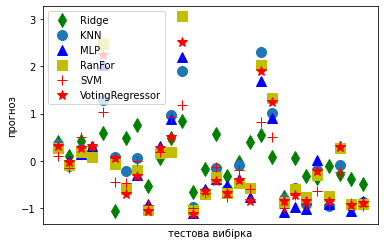

In [432]:
plt.figure()
plt.plot(ridge_result[::200], 'gd', ms = 10, label = 'Ridge')
plt.plot(knn_result[::200], 'o', ms = 10, label = 'KNN')
plt.plot(mlp_result[::200], 'b^', ms = 10, label = 'MLP')
plt.plot(forest_result[::200], 'ys', ms = 10, label = 'RanFor')
plt.plot(svm_result[::200], 'r+', ms = 10, label = 'SVM')
plt.plot(ensemble_result[::200], 'r*', ms = 10, label = 'VotingRegressor')

plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('прогноз')
plt.xlabel('тестова вибірка')
plt.legend(loc = "best")

plt.show()

In [435]:
from sklearn.metrics import mean_absolute_error as mse

print(mse(Y_test, ensemble_result))

# type(X_test)
# ensemble.predict()

0.2824081276460505


# Аналіз результатів

## 1. Вплив відновлення пропущених значень порівняно з видаленням їх з вибірки.

Вибраний датасет не містив пропущені значення або NaN, але під час виконання лабораторних робіт практично було встановлено що краще відновити пропущені значення, аніж видаляти їх.

## 2. Аналіз побудованих графіків та гістограм для різних ознак.

З Linear-, Bar-plots та Pair-plots видно, що температура повітря та місяць року є більш ваговими ознаками ніж інші. На графіку pairplot можна помітити що count залежить від температури повітря майже лінійно, що підтверджується кореляційною матрицею.

## 3. Аналіз отриманих даних після застосування алгоритму зменшення розмірності.

Після зменшення розмірності загальні тенденції не змінилися, PC_1 візуально складає з count майже таку ж лінійну залежність, як і temp до застосування алгоритма РСА.

## 4. Аналіз впливу зменшення розмірності даних на точність моделі.

Зменшення розмірності негативно вплинуло на точність всіх моделей, похибка на навчальних та тестових вибірках зросла, тому моделі навчалися на повних, але стандартизованих даних.

## 5. Аналіз залежності між предикторами та досліджуваною величиною.

Кореляційна матриця повністю підтверджує результати обробки даних, отриманих на етапі візуалізації: коефіцієнт Пірсона між temp та hour і count становить відповідно 0.39 та 0.4, що свідчить про досить високу кореляцію (значно більшу, ніж у інших параметрів, хоча й не достатньо велику), коефіцієнт Пірсона між holiday та workingday і count становить менше 0.1, що свідчить про низьку кореляцію.

## 6. Аналіз розподілу вхідних даних, аналіз викидів, після переведення його до нормального, за правилом 68-95-99.7

Розподіл початкових вхідних даних не сильно схожий на типові статистичні розподіли, після стандартизації даних, розподілом став стандартно-нормальний, після використання правила 3-сігма не було визначено та вилучено жодного викида, тому що значення всіх признаків знаходяться в межах µ - 3σ ; µ + 3σ.


## 7. Аналіз результатів тесту Колмогорова-Смірнова.

Тест Колмогорова-Смірнова для кожного набору даних, як і очікувалось, підтвердив гіпотезу про приналежність даних до стандартно-нормального розподілу на рівні значущості 0.05.


## 8. Як підрахунок різних точностей описує поведінку навчених моделей.

Для оцінювання точності моделей використовувались коефіцієнт детермінації та cередньоквадратична похибка, в процентному співвідношенні для кожної моделі відношення оцінок знаходяться на приблизно однакових рівнях,що дозволяє зробити висновок при прийнятність обох методів оцінки.


## 9. Вибір оптимальних параметрів моделі, їх обґрунтування.

Для об'єктивності тестування моделей всі без винятку параметри були встановлені за замовчуванням, але для даної задачі ці параметри майже завжди і є оптимальними.


## 10. Оцінка помилок на начальній та тестовій вибірках.

Похибка на навчальній та тестовій виборках виводиться під кожною нодою, що містить модель.


## 11. Вибір найкращих моделей для ансамблювання на основі їх точностей та вибір всіх моделей для ансамблювання.

Після аналізу результатів в якості найкращих моделей були обрані MLPRegressor та RandomForestRegressor. Їх ансамблювання дозволило отримати більш стійкий та зважений результат, який виявився кращим ніж точність майже всіх (RandomForestRegressor) моделей поодинці. Ансамблювання всіх моделей, на мою думку, не має сенсу, в умовах тих результатів, які я отримав.


## 12. Порівняння точності ансамблю та найкращої моделі.

Точність найкращої моделі, RandomForest:


In [448]:
1 - model_data.iloc[-1]['test error']

0.8443354521423834

Точність ансамблю:

In [453]:
ensemble.score(X_test, Y_test)

0.8273973851086763

In [455]:
diff = ensemble.score(X_test, Y_test) + model_data.iloc[0]['test error'] - 1
print(diff)

0.07688299948994581


Різниця у відсотках

In [459]:
round(100 * diff, 3)

7.688

## Висновки

Отже, під час виконання курсової роботи, ми навчилися знаходити й позбуватися від пропущених значень в даних, візуалізовувати та знаходити залежності даних. Також розібрались в одному з можливих способів визначання інформативності признаків, за допомогою моделі Random Forest, та у методі пониження розмірності даних - PCA. Навчились оцінювати залежності між набором даних та набором предикторів використовуючи коефіцієнт Пірсона, а також проводити тест Колмогорова-Смірнова. Пересвідчились в коректності й використали правило 68-95-99.7.

Ми провели значний аналіз всіх результатів, тим самим навчилися виявляти важливі фактори, які впливають на точність результату, та навпаки фактори які є негативними для нас. Ці, і не тільки ці навички, які ми здобули виконуючи курсовую роботу, допомогли нам глибше розібратися в актуальних методах машинного навчання, а також в ефективному аналізу даних, що є цінним досвідом для майбутніх проєктів.
